In [ ]:
#@title ## Big Data Lab  - Assignment 4 - Random forests
#@markdown ### Instructions
#@markdown 1. The purpose of this assignment is to cover the necessary pandas library operations 
#@markdown  you need to dominate in order to handle the course material.
#@markdown 2. Please complete the assignment on your own. You are welcome to discuss your work with your fellow students but to maintain a healthy learning process - please keep all final answers to yourself! 
#@markdown 3. Complete the answers in the empty cells - Feel free to add as many extra cell as you require.
#@markdown 4. Fill in your name and select the Year and Department.
#@markdown 5. When done - Download the colab notebook by going to 'File -> Download .ipynb' and submit the file in the course's moodle page before the due date. 
 
#@markdown ---
#@markdown ### Enter your information:
Full_Name = "Yahav Mesika" #@param {type:"string"}
Depatment = "Industrial Engineering" #@param ["Select","Computer Science", "Industrial Engineering", "Economics and Management"]
Year = "Third" #@param ["Select","Second", "Third", "Fourth"]

#@markdown ---


1. Import the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import seaborn as sns

2. Create a dataframe from the following link. Name it "wine_df".
>'https://raw.githubusercontent.com/ShaiShmuel/BigData_Course/main/bigData/DataSets/wine_.csv'

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/ShaiShmuel/BigData_Course/main/bigData/DataSets/wine_.csv')


##Know your data
Here is a summary of the dataframe features.

Attribute Information:
Input variables (based on physicochemical tests):

1 - fixed acidity

2 - volatile acidity

3 - citric acid

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulphates

11 - alcohol

12 - quality ('good' and 'bad' based on score >5 and <5)

3. Print the head, info and the statistical analysis of the dataframe

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1583 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1583.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996739,3.281082,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001888,0.354124,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,0.000000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996740,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


4. What is the dataframe's shape?

In [ ]:
df.shape

(1599, 12)

5. Plot ouliers for columns 'pH' 'sulphats' 'alcohol'

In [ ]:
fig = go.Figure()
fig.add_trace(go.Box(name='pH',y=df.pH))
fig.add_trace(go.Box(name='alcohol',y=df.alcohol))
fig.add_trace(go.Box(name='sulphates',y=df.sulphates))

fig.show()

6. Keep rows that have pH value that is greater than 0 and print the shape


In [ ]:
df= df[df.pH != 0]
df.shape

(1584, 12)

7. a. Chek missing values

In [ ]:
df.isnull().sum()

fixed acidity            0
volatile acidity         0
citric acid              0
residual sugar           0
chlorides                0
free sulfur dioxide      0
total sulfur dioxide     0
density                 16
pH                       0
sulphates                0
alcohol                  0
quality                  0
dtype: int64

7. b. Delete rows with missing values

In [ ]:
df.dropna(axis=0 , inplace=True)
df.isnull().sum()

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

8. Sort the dataframe by alcohol from low to high and reset the index 

In [ ]:
df=df.sort_values(by='alcohol')
df.reset_index(inplace=True)
df.head(10)

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,517,10.4,0.61,0.49,2.1,0.200,5.0,16.0,0.99940,3.16,0.63,8.4,bad
1,544,14.3,0.31,0.74,1.8,0.075,6.0,15.0,1.00080,2.86,0.79,8.4,good
2,1436,10.0,0.38,0.38,1.6,0.169,27.0,90.0,0.99914,3.15,0.65,8.5,bad
3,371,7.9,0.24,0.40,1.6,0.056,11.0,25.0,0.99670,3.32,0.87,8.7,good
4,528,8.2,0.42,0.49,2.6,0.084,32.0,55.0,0.99880,3.34,0.75,8.7,good
5,1474,9.9,0.50,0.50,13.8,0.205,48.0,82.0,1.00242,3.16,0.75,8.8,bad
6,1476,9.9,0.50,0.50,13.8,0.205,48.0,82.0,1.00242,3.16,0.75,8.8,bad
7,496,7.8,0.52,0.25,1.9,0.081,14.0,38.0,0.99840,3.43,0.65,9.0,good
8,601,13.2,0.46,0.52,2.2,0.071,12.0,35.0,1.00060,3.10,0.56,9.0,good
9,239,8.2,1.00,0.09,2.3,0.065,7.0,37.0,0.99685,3.32,0.55,9.0,good


8. Draw correlation heat map in order to find highly correlated features(drop highly correlated features **if neseccesery**, higher then 0.85)

In [ ]:
corr_df=df.corr()
fig = go.Figure()
fig.add_traces(go.Heatmap(
    z=corr_df, 
    x=corr_df.columns, 
    y=corr_df.columns,
    zmax=1, 
    zmin=-1
))
fig.update_layout({
    'title':"Features Correlation Heatmap"
})

In [ ]:
#check if there is highly correlated features, higher then 0.85 --> not exist
cols = corr_df.columns.to_list()
for i in range(len(cols)):
  print(cols[i], ': ', end=' ')
  for j in range(len(cols)):
    if abs(corr_df.iloc[i,j]) >= 0.85 and cols[i] is not cols[j] :
      print(cols[j], end=', ')
  print()

index :  
fixed acidity :  
volatile acidity :  
citric acid :  
residual sugar :  
chlorides :  
free sulfur dioxide :  
total sulfur dioxide :  
density :  
pH :  
sulphates :  
alcohol :  


9. Convert the 'quality' values to 1, 0 ('good' or 'bad) it's essential for running the model

In [ ]:
from pandas._libs import index
df['quality'].replace(['bad', 'good'], [0, 1], inplace=True)
df.drop(['index'], axis=1,inplace=True)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,10.4,0.61,0.49,2.1,0.200,5.0,16.0,0.99940,3.16,0.63,8.4,0
1,14.3,0.31,0.74,1.8,0.075,6.0,15.0,1.00080,2.86,0.79,8.4,1
2,10.0,0.38,0.38,1.6,0.169,27.0,90.0,0.99914,3.15,0.65,8.5,0
3,7.9,0.24,0.40,1.6,0.056,11.0,25.0,0.99670,3.32,0.87,8.7,1
4,8.2,0.42,0.49,2.6,0.084,32.0,55.0,0.99880,3.34,0.75,8.7,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.0,1
1564,5.5,0.49,0.03,1.8,0.044,28.0,87.0,0.99080,3.50,0.82,14.0,1
1565,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,1
1566,8.8,0.46,0.45,2.6,0.065,7.0,18.0,0.99470,3.32,0.79,14.0,1


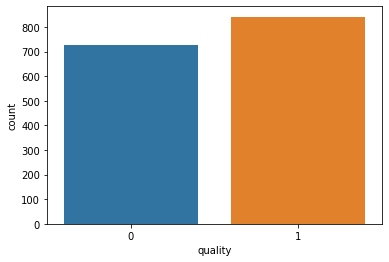

In [ ]:
sns.countplot(x=df.quality)

10. Split to train and test sets

In [ ]:
# set X y
y = df['quality']
X = df.drop('quality',axis=1)


In [ ]:
#split to train test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

11. Import the DecisionTreeClassifier object and train the model

    * use the following parameters:

      - criterion = "entropy"

      - max_depth = 9




In [ ]:
from sklearn.tree import DecisionTreeClassifier

#we can prune the tree by specifing the max depth
dtree = DecisionTreeClassifier(criterion="entropy",max_depth=9)


In [ ]:
#train
dtree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9)

##Prediction and Evaluation

11.
* predict and predict probability using the X test data set
* create a data frame with the probabilitis(0 and 1), prediction and the actual class

In [ ]:
y_pred = dtree.predict(X_test)

from pandas.core.frame import DataFrame
probability = dtree.predict_proba(X_test)
prediction = dtree.predict(X_test)
prediction
prob_0 = pd.Series(probability[:,0], name ='probability_0', index=X_test.index)
prob_1 = pd.Series(probability[:,1], name ='probability_1', index=X_test.index)
predict = pd.Series(prediction, name='prediction', index=y_test.index)

test_results = pd.DataFrame(data={'probability_0':prob_0, 'probability_1':prob_1,'prediction':predict, 'actual':y_test})

test_results


,probability_0,probability_1,prediction,actual
57,0.000000,1.000000,1,0
78,0.333333,0.666667,1,0
142,0.454545,0.545455,1,0
1343,1.000000,0.000000,0,1
1161,0.000000,1.000000,1,1
...,...,...,...,...
268,0.777778,0.222222,0,0
1356,0.000000,1.000000,1,1
586,0.958333,0.041667,0,1
1239,0.000000,1.000000,1,1


12.Print the classification report

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[148  67]
 [ 53 203]]
              precision    recall  f1-score   support

           0       0.74      0.69      0.71       215
           1       0.75      0.79      0.77       256

    accuracy                           0.75       471
   macro avg       0.74      0.74      0.74       471
weighted avg       0.74      0.75      0.74       471



13. Plot the ROC curve

In [ ]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities for 1
from sklearn import metrics
fp_rate, tp_rate, thresholds = metrics.roc_curve(y_test,prob_1)


In [ ]:
fig=go.Figure()
trace=go.Scatter(x=fp_rate, y=tp_rate, mode='lines', hoverinfo='x+y+text', text=thresholds)
fig.add_trace(trace)
fig.update_layout(
    title="ROC curve for diabetes classifier",
    xaxis_title="False Positive Rate (1 - Specificity)",
    yaxis_title="True Positive Rate (Sensitivity/Recall)",
    
)
fig.show()

14. Calculate AUC

In [ ]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
AUC = metrics.roc_auc_score(y_test, prob_1)
print('AUC',AUC)

AUC 0.7954760174418605


15.Improve the model by changing the threshold

- ROC curve can help you to **choose a threshold** that balances sensitivity and specificity in a way that makes sense for your particular context

In [ ]:
from sklearn.preprocessing import binarize
y_pred_03 = binarize(X=[prob_1], threshold=0.8)[0]
y_pred_03 = pd.Series(y_pred_03)
y_pred_03

0      1.0
1      0.0
2      0.0
3      0.0
4      1.0
      ... 
466    0.0
467    1.0
468    0.0
469    1.0
470    0.0
Length: 471, dtype: float64

Print the confusion metrics for the new predictions(with the new threshold) - it should be slightly improved!

In [ ]:
print(confusion_matrix(y_test,y_pred_03))
print(classification_report(y_test,y_pred_03))

[[173  42]
 [ 72 184]]
              precision    recall  f1-score   support

           0       0.71      0.80      0.75       215
           1       0.81      0.72      0.76       256

    accuracy                           0.76       471
   macro avg       0.76      0.76      0.76       471
weighted avg       0.76      0.76      0.76       471



###Running the cross validation procedure and get the score.


16.a. Calculate f1 scores using cross validation - your results may be a little bit different.

- use cv = 30

In [ ]:
from sklearn.model_selection import cross_val_score
f1_scores = cross_val_score(dtree, X, y, cv=30, scoring='f1') 
f1_scores

array([0.53061224, 0.54901961, 0.52173913, 0.32432432, 0.5       ,
       0.17142857, 0.55555556, 0.59574468, 0.6122449 , 0.4       ,
       0.78431373, 0.59259259, 0.61818182, 0.70588235, 0.82142857,
       0.75      , 0.75862069, 0.77419355, 0.81818182, 0.67741935,
       0.6969697 , 0.67857143, 0.6984127 , 0.7826087 , 0.75362319,
       0.70422535, 0.76190476, 0.75675676, 0.50746269, 0.71794872])

b. Calculate accuracy scores using cross validation - your results may be a little bit different.

- use cv = 30

In [ ]:
accuracy = cross_val_score(dtree, X, y, cv=30, scoring='accuracy') 
accuracy

array([0.56603774, 0.54716981, 0.62264151, 0.52830189, 0.62264151,
       0.45283019, 0.56603774, 0.64150943, 0.63461538, 0.53846154,
       0.76923077, 0.55769231, 0.57692308, 0.73076923, 0.78846154,
       0.75      , 0.86538462, 0.73076923, 0.76923077, 0.57692308,
       0.61538462, 0.63461538, 0.65384615, 0.71153846, 0.63461538,
       0.61538462, 0.69230769, 0.67307692, 0.36538462, 0.57692308])

17. Print the mean values of the f1 and accuracy scores

In [ ]:
print('F1 :',f1_scores.mean())
print('ACC : ',accuracy.mean())

F1 : 0.6373322489431202
ACC :  0.6336236090953073


# Bonus ---optional task---

Do questions 10 - 17 with the random forests classifier model and see the difference



In [ ]:
#split to train test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50, criterion='entropy', max_depth=9)

In [ ]:
rfc.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=9, n_estimators=50)

In [ ]:
y_pred = rfc.predict(X_test)

from pandas.core.frame import DataFrame
probability = rfc.predict_proba(X_test)
prediction = rfc.predict(X_test)
prediction
prob_0 = pd.Series(probability[:,0], name ='probability_0', index=X_test.index)
prob_1 = pd.Series(probability[:,1], name ='probability_1', index=X_test.index)
predict = pd.Series(prediction, name='prediction', index=y_test.index)

test_results = pd.DataFrame(data={'probability_0':prob_0, 'probability_1':prob_1,'prediction':predict, 'actual':y_test})

test_results

,probability_0,probability_1,prediction,actual
57,0.525102,0.474898,0,0
78,0.425845,0.574155,1,0
142,0.677876,0.322124,0,0
1343,0.145430,0.854570,1,1
1161,0.237195,0.762805,1,1
...,...,...,...,...
268,0.778748,0.221252,0,0
1356,0.000000,1.000000,1,1
586,0.804366,0.195634,0,1
1239,0.070160,0.929840,1,1


In [ ]:
y_predict = rfc.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,y_predict))
print('----------------------------------------------------------')
print(classification_report(y_test,y_predict))

[[172  43]
 [ 48 208]]
----------------------------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       215
           1       0.83      0.81      0.82       256

    accuracy                           0.81       471
   macro avg       0.81      0.81      0.81       471
weighted avg       0.81      0.81      0.81       471



In [ ]:
fig=go.Figure()
trace=go.Scatter(x=fp_rate, y=tp_rate, mode='lines', hoverinfo='x+y+text', text=thresholds)
fig.add_trace(trace)
fig.update_layout(
    title="ROC curve for diabetes classifier",
    xaxis_title="False Positive Rate (1 - Specificity)",
    yaxis_title="True Positive Rate (Sensitivity/Recall)",
    
)
fig.show()

In [ ]:
AUC = metrics.roc_auc_score(y_test, prob_1)
print('AUC',AUC)

AUC 0.8815225290697674


In [ ]:
from sklearn.preprocessing import binarize
y_pred_03 = binarize(X=[prob_1], threshold=0.5)[0]
y_pred_03 = pd.Series(y_pred_03)
y_pred_03

0      0.0
1      1.0
2      0.0
3      1.0
4      1.0
      ... 
466    0.0
467    1.0
468    0.0
469    1.0
470    0.0
Length: 471, dtype: float64

In [ ]:
from sklearn import metrics
fp_rate, tp_rate, thresholds = metrics.roc_curve(y_test,y_pred_03)


In [ ]:
print(confusion_matrix(y_test,y_pred_03))
print(classification_report(y_test,y_pred_03))

[[172  43]
 [ 48 208]]
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       215
           1       0.83      0.81      0.82       256

    accuracy                           0.81       471
   macro avg       0.81      0.81      0.81       471
weighted avg       0.81      0.81      0.81       471



In [ ]:
from sklearn.model_selection import cross_val_score
f1_scores = cross_val_score(rfc, X, y, cv=30, scoring='f1')
f1_scores

array([0.28571429, 0.38888889, 0.32432432, 0.41025641, 0.19354839,
       0.28571429, 0.51162791, 0.68181818, 0.71111111, 0.47368421,
       0.80851064, 0.73076923, 0.82142857, 0.83018868, 0.86792453,
       0.88135593, 0.87719298, 0.93333333, 0.9       , 0.81967213,
       0.84375   , 0.75      , 0.73972603, 0.77777778, 0.75      ,
       0.72727273, 0.77777778, 0.73684211, 0.7012987 , 0.7       ])

In [ ]:
accuracy_scores = cross_val_score(rfc, X, y, cv=30, scoring='accuracy')
accuracy_scores

array([0.56603774, 0.56603774, 0.54716981, 0.50943396, 0.56603774,
       0.56603774, 0.62264151, 0.73584906, 0.73076923, 0.61538462,
       0.82692308, 0.71153846, 0.69230769, 0.78846154, 0.86538462,
       0.90384615, 0.90384615, 0.88461538, 0.84615385, 0.82692308,
       0.78846154, 0.67307692, 0.63461538, 0.63461538, 0.67307692,
       0.61538462, 0.69230769, 0.63461538, 0.51923077, 0.53846154])

In [ ]:
print('Mean values')
print('f1:', f1_scores.mean())
print('accuracy: ', accuracy_scores.mean())


Mean values
f1: 0.6747169712132658
accuracy:  0.6893081761006291
